### Setup

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
import codecs

### Load Data

In [2]:
base_path = Path('src')

img_train = base_path / 'train_images'
img_test = base_path / 'test_images'

In [3]:
df_train = pd.read_csv(base_path / 'train.csv')
df_test = pd.read_csv(base_path / 'test.csv')

Fix encoding

In [4]:
df_train.title = df_train.title.apply(lambda x: codecs.escape_decode(x)[0].decode('utf8'))
df_test.title = df_test.title.apply(lambda x: codecs.escape_decode(x)[0].decode('utf8'))

In [5]:
df_train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe Éclair Latte 220ml,3648931069


In [56]:
nr_inst = len(df_train)
nr_groups = df_train.label_group.nunique()

print(f'Number of instances: {nr_inst}')
print(f'Number of unique label_groups: {nr_groups}')

Number of instances: 34250
Number of unique label_groups: 11014


Distribution of label_groups

In [17]:
import seaborn as sns

In [71]:
df_group_sizes = df_train.groupby(['label_group']).size().to_frame()
df_group_sizes.columns = ['size']

Most items are grouped with only one other item.

<AxesSubplot:ylabel='Count'>

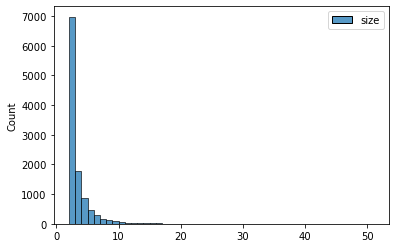

In [72]:
sns.histplot(df_group_sizes, binwidth= 1)

In [73]:
nr_small_groups = df_group_sizes[df_labels_grouped['size'] <= 10].count()['size']
print(f'{round(nr_small_groups / nr_groups * 100,2)} % of the label_groups contain at most 10 items')

97.88 % of the label_groups contain at most 10 items


In [79]:
max_group = df_group_sizes.idxmax()['size']
print('Maximal group size: {}, Label of group of maximal size: {}'.format(df_group_sizes.max()['size'],max_group))

Maximal group size: 51, Label of group of maximal size: 159351600


In [82]:
df_train[df_train.label_group == max_group].sample(5)

,posting_id,image,image_phash,title,label_group
32089,train_1061695682,f08c575873d6d31183d9e27995d73f22.jpg,e891a3f6a48c3973,"[READY, BISA COD] BPOM GLUTA COLLAGEN SOAP BE...",159351600
5946,train_2902736490,2d0e11ade5ccb02845e71f27fd671ebd.jpg,c993a7ca34c49d33,READY STOCK FREE GIFT GLUTA COLLAGEN SOAP BEAU...,159351600
14877,train_3560974982,702fe543211c2d2234828b7f0cd41742.jpg,c993a7ca34c49d33,"[READY STOCK, FREE JARING SABUN!!!] Gluta coll...",159351600
2069,train_1619338643,0ff3d417c454a614596da0f160e85b83.jpg,e3d894276a58c1de,GLUTA COLLAGEN SOAP BY BEAUTETOX SKINSUPERSTAR,159351600
24564,train_1142799664,b83c819c4ed72c2b86c1ba945db841bc.jpg,ea95956a968d1933,GLUTA COLLAGEN SOAP BEAUTETOX,159351600


* It might make sense to sample a smaller subset of big label_groups to balance the dataset.